In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
products = pd.read_csv('products.csv')
order_products = pd.read_csv('order_products__prior.csv')
products = products[['product_name', 'product_id']]
order_products = order_products[['product_id', 'order_id', 'reordered']]

In [3]:
row = 0
cookie_id = []
cereal_id = []
ice_cream_id = []
coffee_id = []
apple_id = []
broccoli_id = []
for product in products['product_name']:
    if re.search('[Cc]ookie', product) is not None:
        cookie_id.append(products['product_id'].loc[row])
    if re.search('[Cc]ereal', product) is not None:
        cereal_id.append(products['product_id'].loc[row])
    if re.search('[Ii]ce [Cc]ream', product) is not None:
        ice_cream_id.append(products['product_id'].loc[row])
    if re.search('[Cc]offee', product) is not None:
        coffee_id.append(products['product_id'].loc[row])
    if re.search('[Aa]pple', product) is not None:
        apple_id.append(products['product_id'].loc[row])
    if re.search('[Bb]roccoli', product) is not None:
        broccoli_id.append(products['product_id'].loc[row])
    row += 1

In [6]:
def times_from_id(prod_id_list):
    first = True
    for prod in prod_id_list:
        is_prod_id = order_products['product_id'] == prod
        order_id = order_products[is_prod_id]
        if first:
            reorders = order_id['reordered']
            first = False
        else:
            reorders.append(order_id['reordered'])

    return reorders

In [7]:
cookie_reorders = times_from_id(cookie_id)

In [8]:
cereal_reorders = times_from_id(cereal_id)
ice_cream_reorders = times_from_id(ice_cream_id)
coffee_reorders = times_from_id(coffee_id)
apple_reorders = times_from_id(apple_id)
broccoli_reorders = times_from_id(broccoli_id)

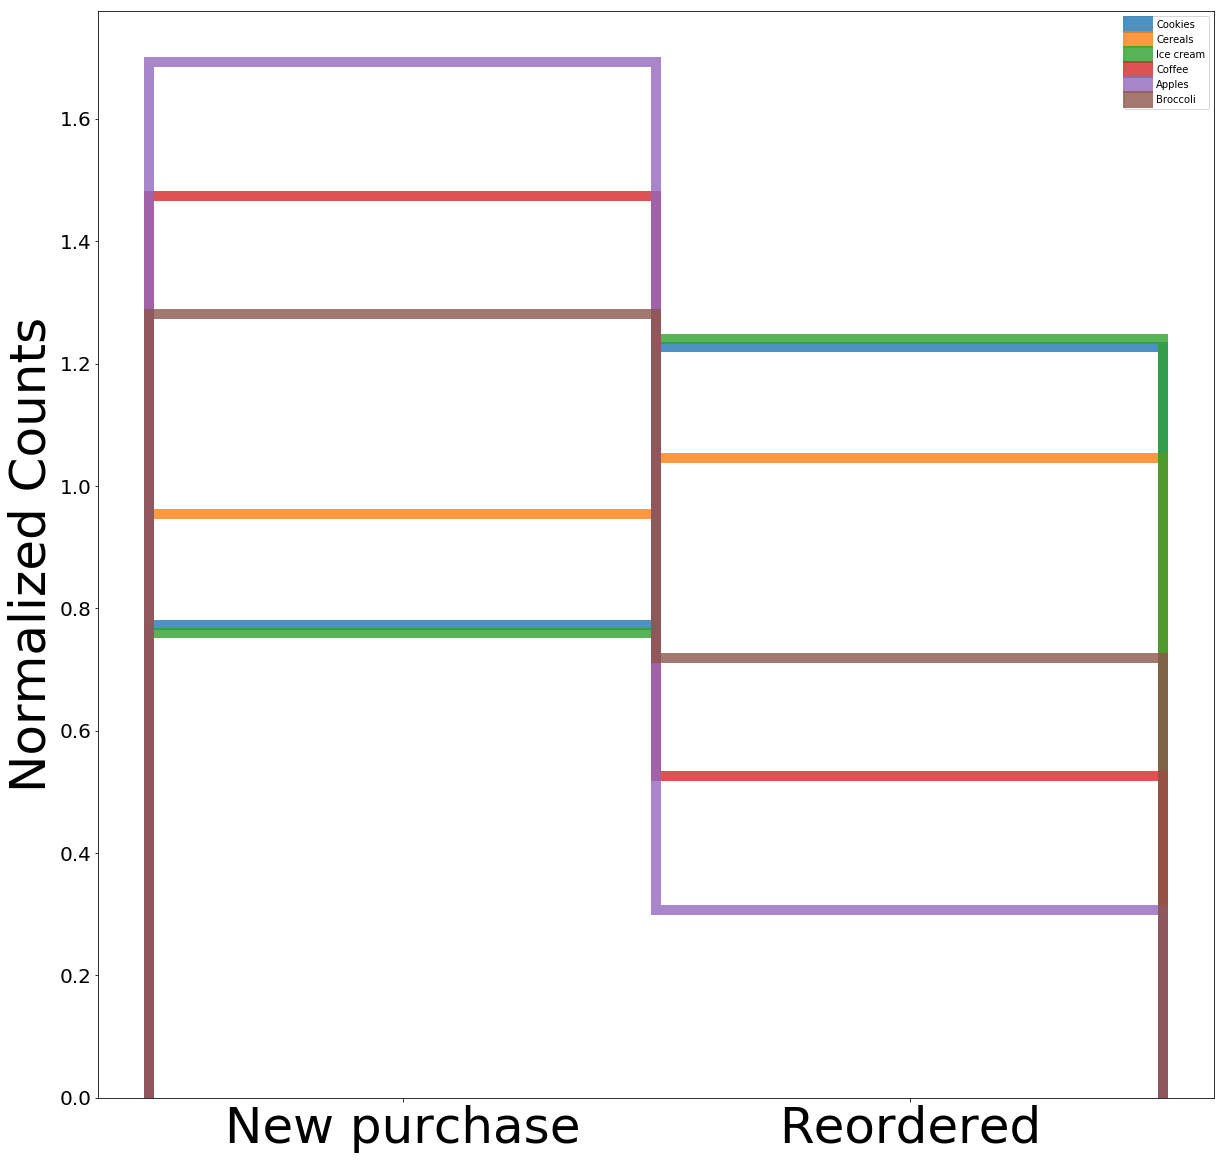

In [32]:
plt.hist(cookie_reorders, bins = 2, alpha = 0.8, normed = True, label = 'Cookies', histtype = 'step', linewidth = 10)
plt.hist(cereal_reorders, bins = 2, alpha = 0.8, normed = True, label = 'Cereals', histtype = 'step', linewidth = 10)
plt.hist(ice_cream_reorders, bins = 2, alpha = 0.8, normed = True, label = 'Ice cream', histtype = 'step', linewidth = 10)
plt.hist(coffee_reorders, bins = 2, alpha = 0.8, normed = True, label = 'Coffee', histtype = 'step', linewidth = 10)
plt.hist(apple_reorders, bins = 2, alpha = 0.8, normed = True, label = 'Apples', histtype = 'step', linewidth = 10)
plt.hist(broccoli_reorders, bins = 2, alpha = 0.8, normed = True, label = 'Broccoli', histtype = 'step', linewidth = 10)


plt.ylabel('Normalized Counts', fontsize = 50)
plt.yticks(fontsize = 20)
my_xticks = ['New purchase', 'Reordered']
plt.xticks([0.25, 0.75],my_xticks, fontsize = 50)
plt.legend(loc = 'upper right')
plt.show()

# Purchase types sorted by new purchases or reorders

This normalized plot highlights new how the purchase of an item type is distrubeted between new purchases—where the user has not ordered the item from the app before—or reorders of the same item. It can be seen that a large majority of apples, coffee, and broccoli are new purchases. Conversely, a large portion of ice cream and cookie purchases are reorders of the same item. Cereal is somewhere in the middle—reorders only slightly outnumber new purchases.